In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def separate_data_points(file_location):
    dataframe = pd.read_csv(file_location, skiprows=[0], header=None)
    print(dataframe)
    return dataframe.iloc[:,9:]
# currently taking a single file
data_points = separate_data_points('../data/1.csv')

     0         1     2     3     4         5     6          7     8     \
0    1171  15:59:04     0  1170     0  0.003003     1  1142900.0  5714   
1    1172  15:59:04     0  1171     0  0.003003     1  1142900.0  5714   
2    1173  15:59:04     0  1172     0  0.003003     1  1142900.0  5714   
3    1174  15:59:05     0  1173     0  0.003003     1  1142900.0  5714   
4    1175  15:59:05     0  1174     0  0.003003     1  1142900.0  5714   
5    1176  15:59:05     0  1175     0  0.003003     1  1142900.0  5714   
6    1177  15:59:06     0  1176     0  0.003003     1  1142900.0  5714   
7    1178  15:59:06     0  1177     0  0.003003     1  1142900.0  5714   
8    1179  15:59:06     0  1178     0  0.003003     1  1142900.0  5714   
9    1180  15:59:07     0  1179     0  0.003003     1  1142900.0  5714   
10   1181  15:59:07     0  1180     0  0.003003     1  1142900.0  5714   
11   1182  15:59:07     0  1181     0  0.003003     1  1142900.0  5714   
12   1183  15:59:07     0  1182     0 

In [3]:
required_data = data_points.iloc[0,:].to_numpy()
mean = np.mean(required_data)
required_data_without_offset = required_data - mean

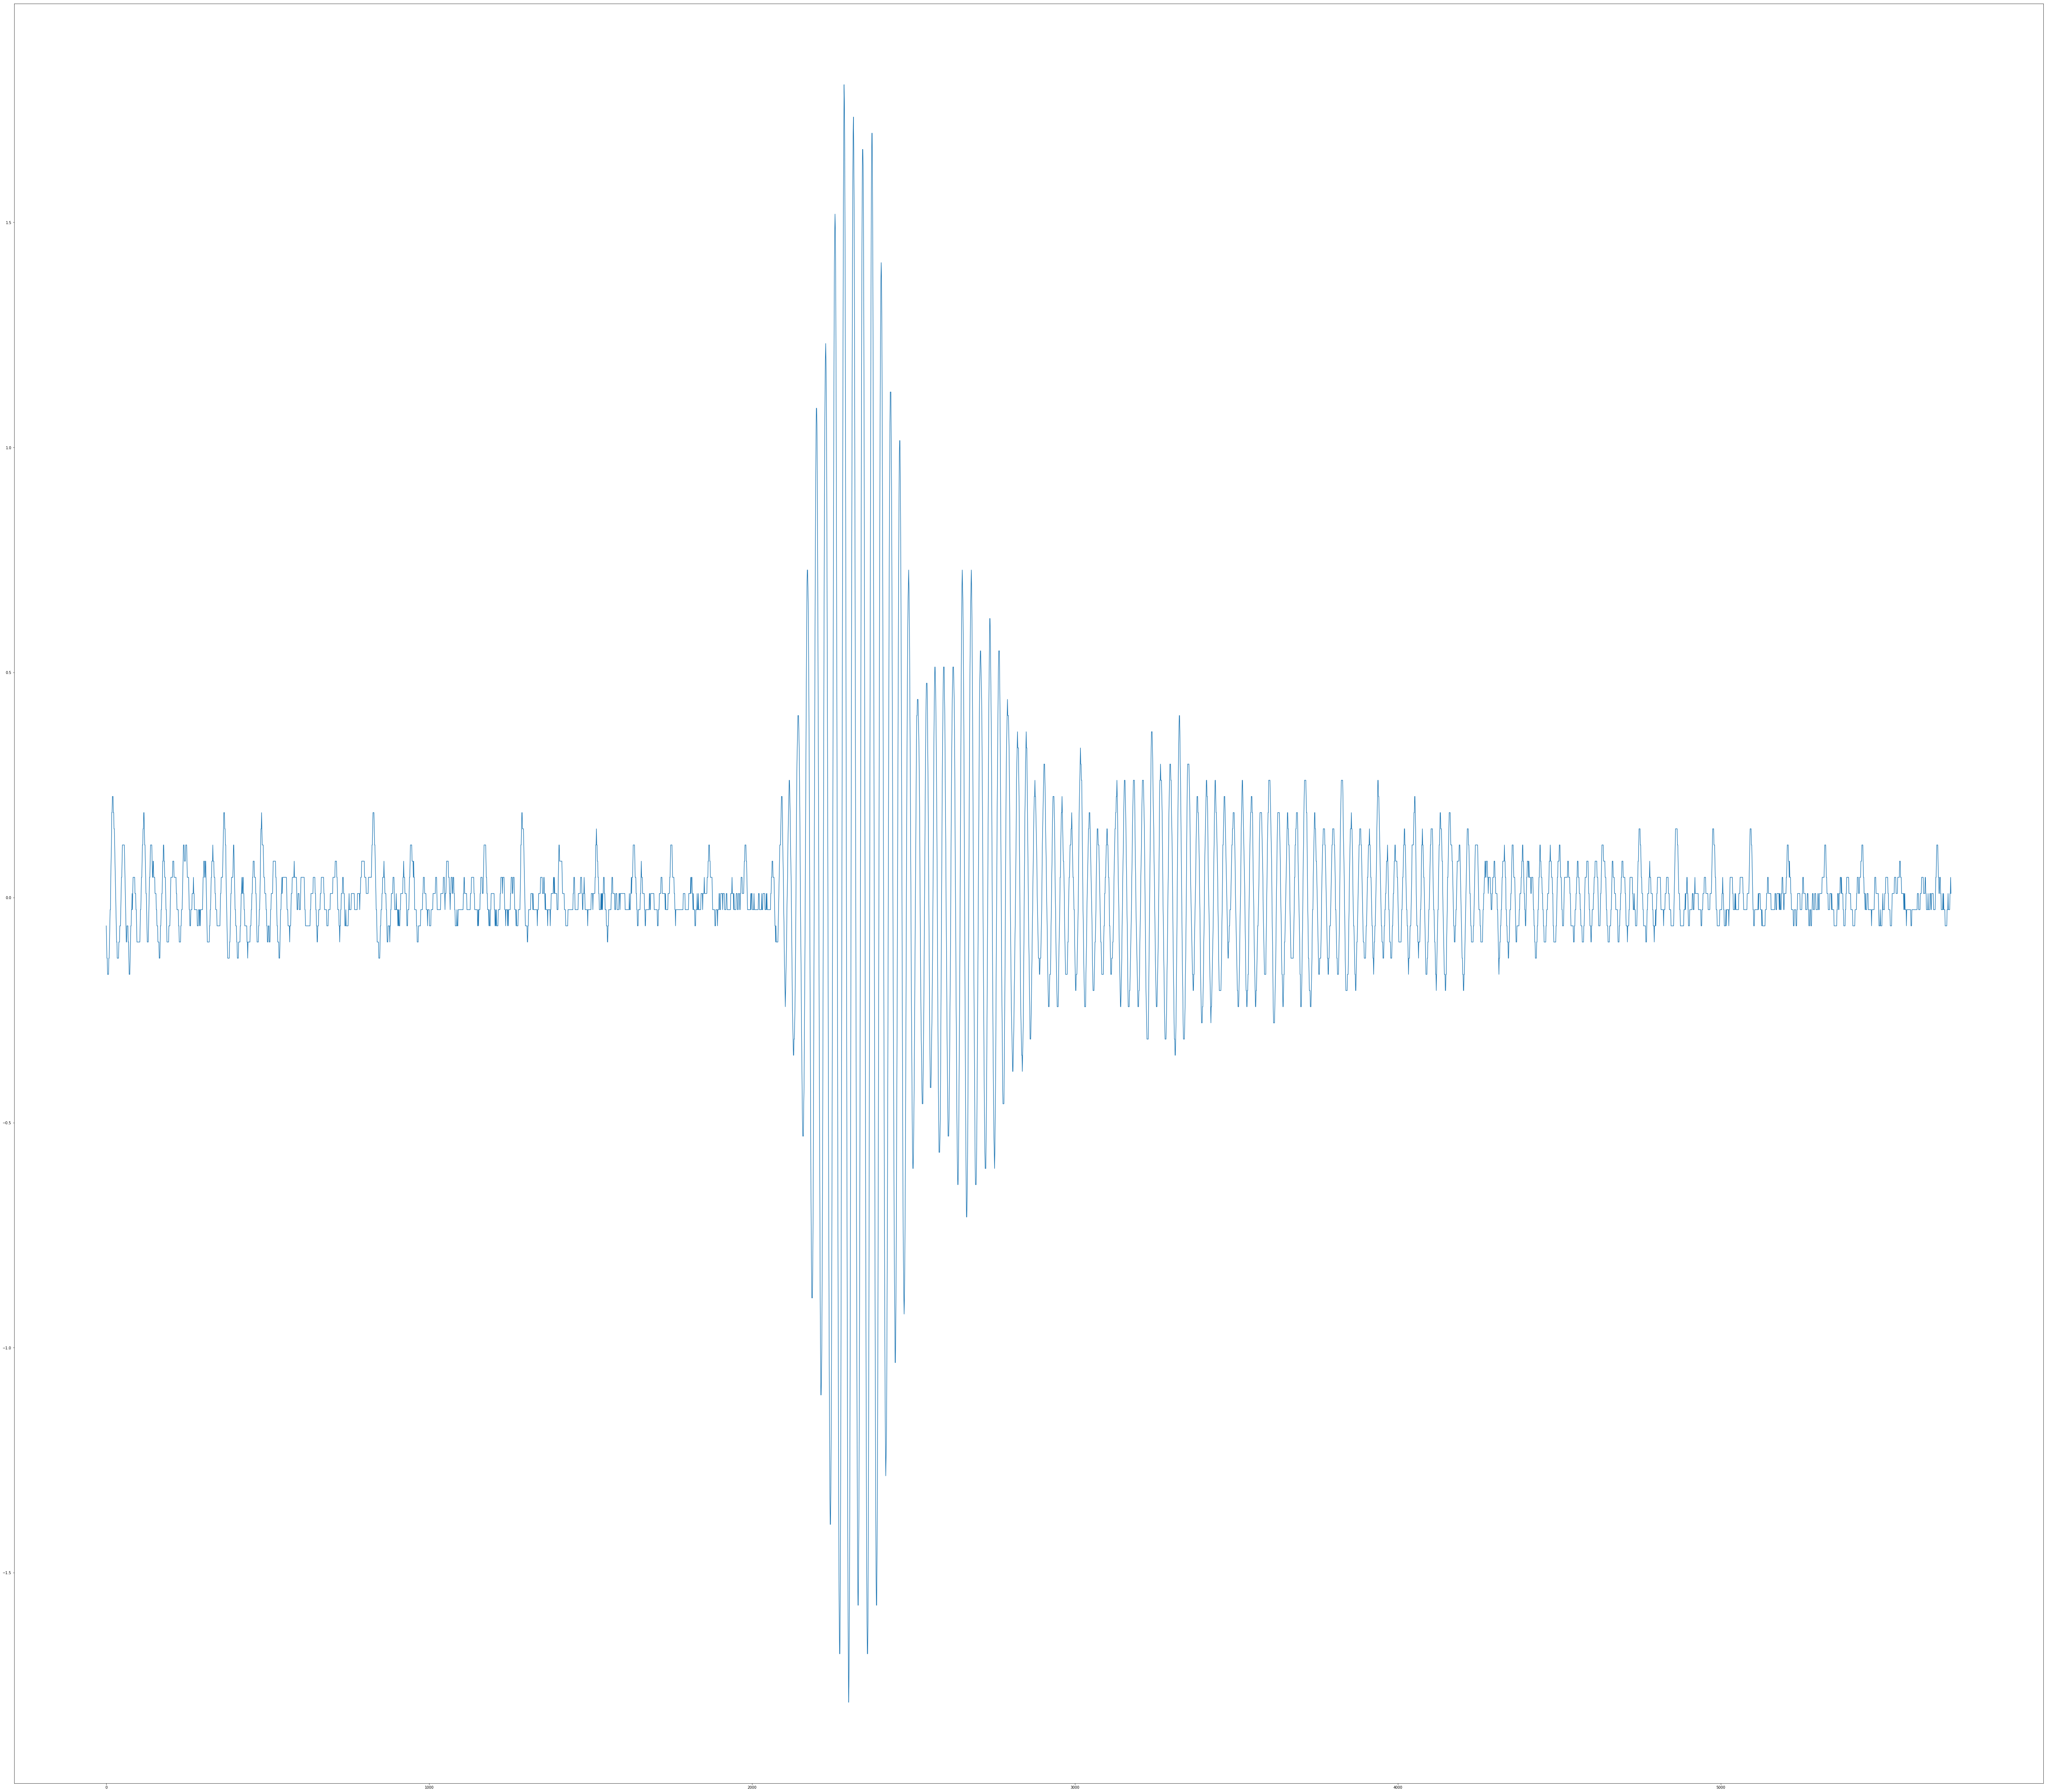

In [7]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(100, 90))
ax = fig.add_subplot(1,1,1)
# ax.set_xlim([600,1500])
ax.plot(required_data_without_offset)

In [11]:
import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq, ifft, rfft

def fft_from_data_frame(data_frame):
    fs = 1.14 * 1000000 #1.14MHZ
    signal_set = []
    for row in data_frame.values:
        fft_data = fft(row, n=row.size)/row.size
        freq = fftfreq(row.size, d=1/fs)
        cut_high_signal = np.abs(fft_data).copy()
        cut_high_signal[(freq > 50000)] = 0
        cut_high_signal[(freq < 30000)] = 0
        signal_without_0 = list(filter(lambda a: a != 0, cut_high_signal))
        signal_set.append(np.abs(signal_without_0))
    return signal_set


In [12]:
ff_data = fft_from_data_frame(data_points)

In [17]:
ff_data[0].shape

(100,)

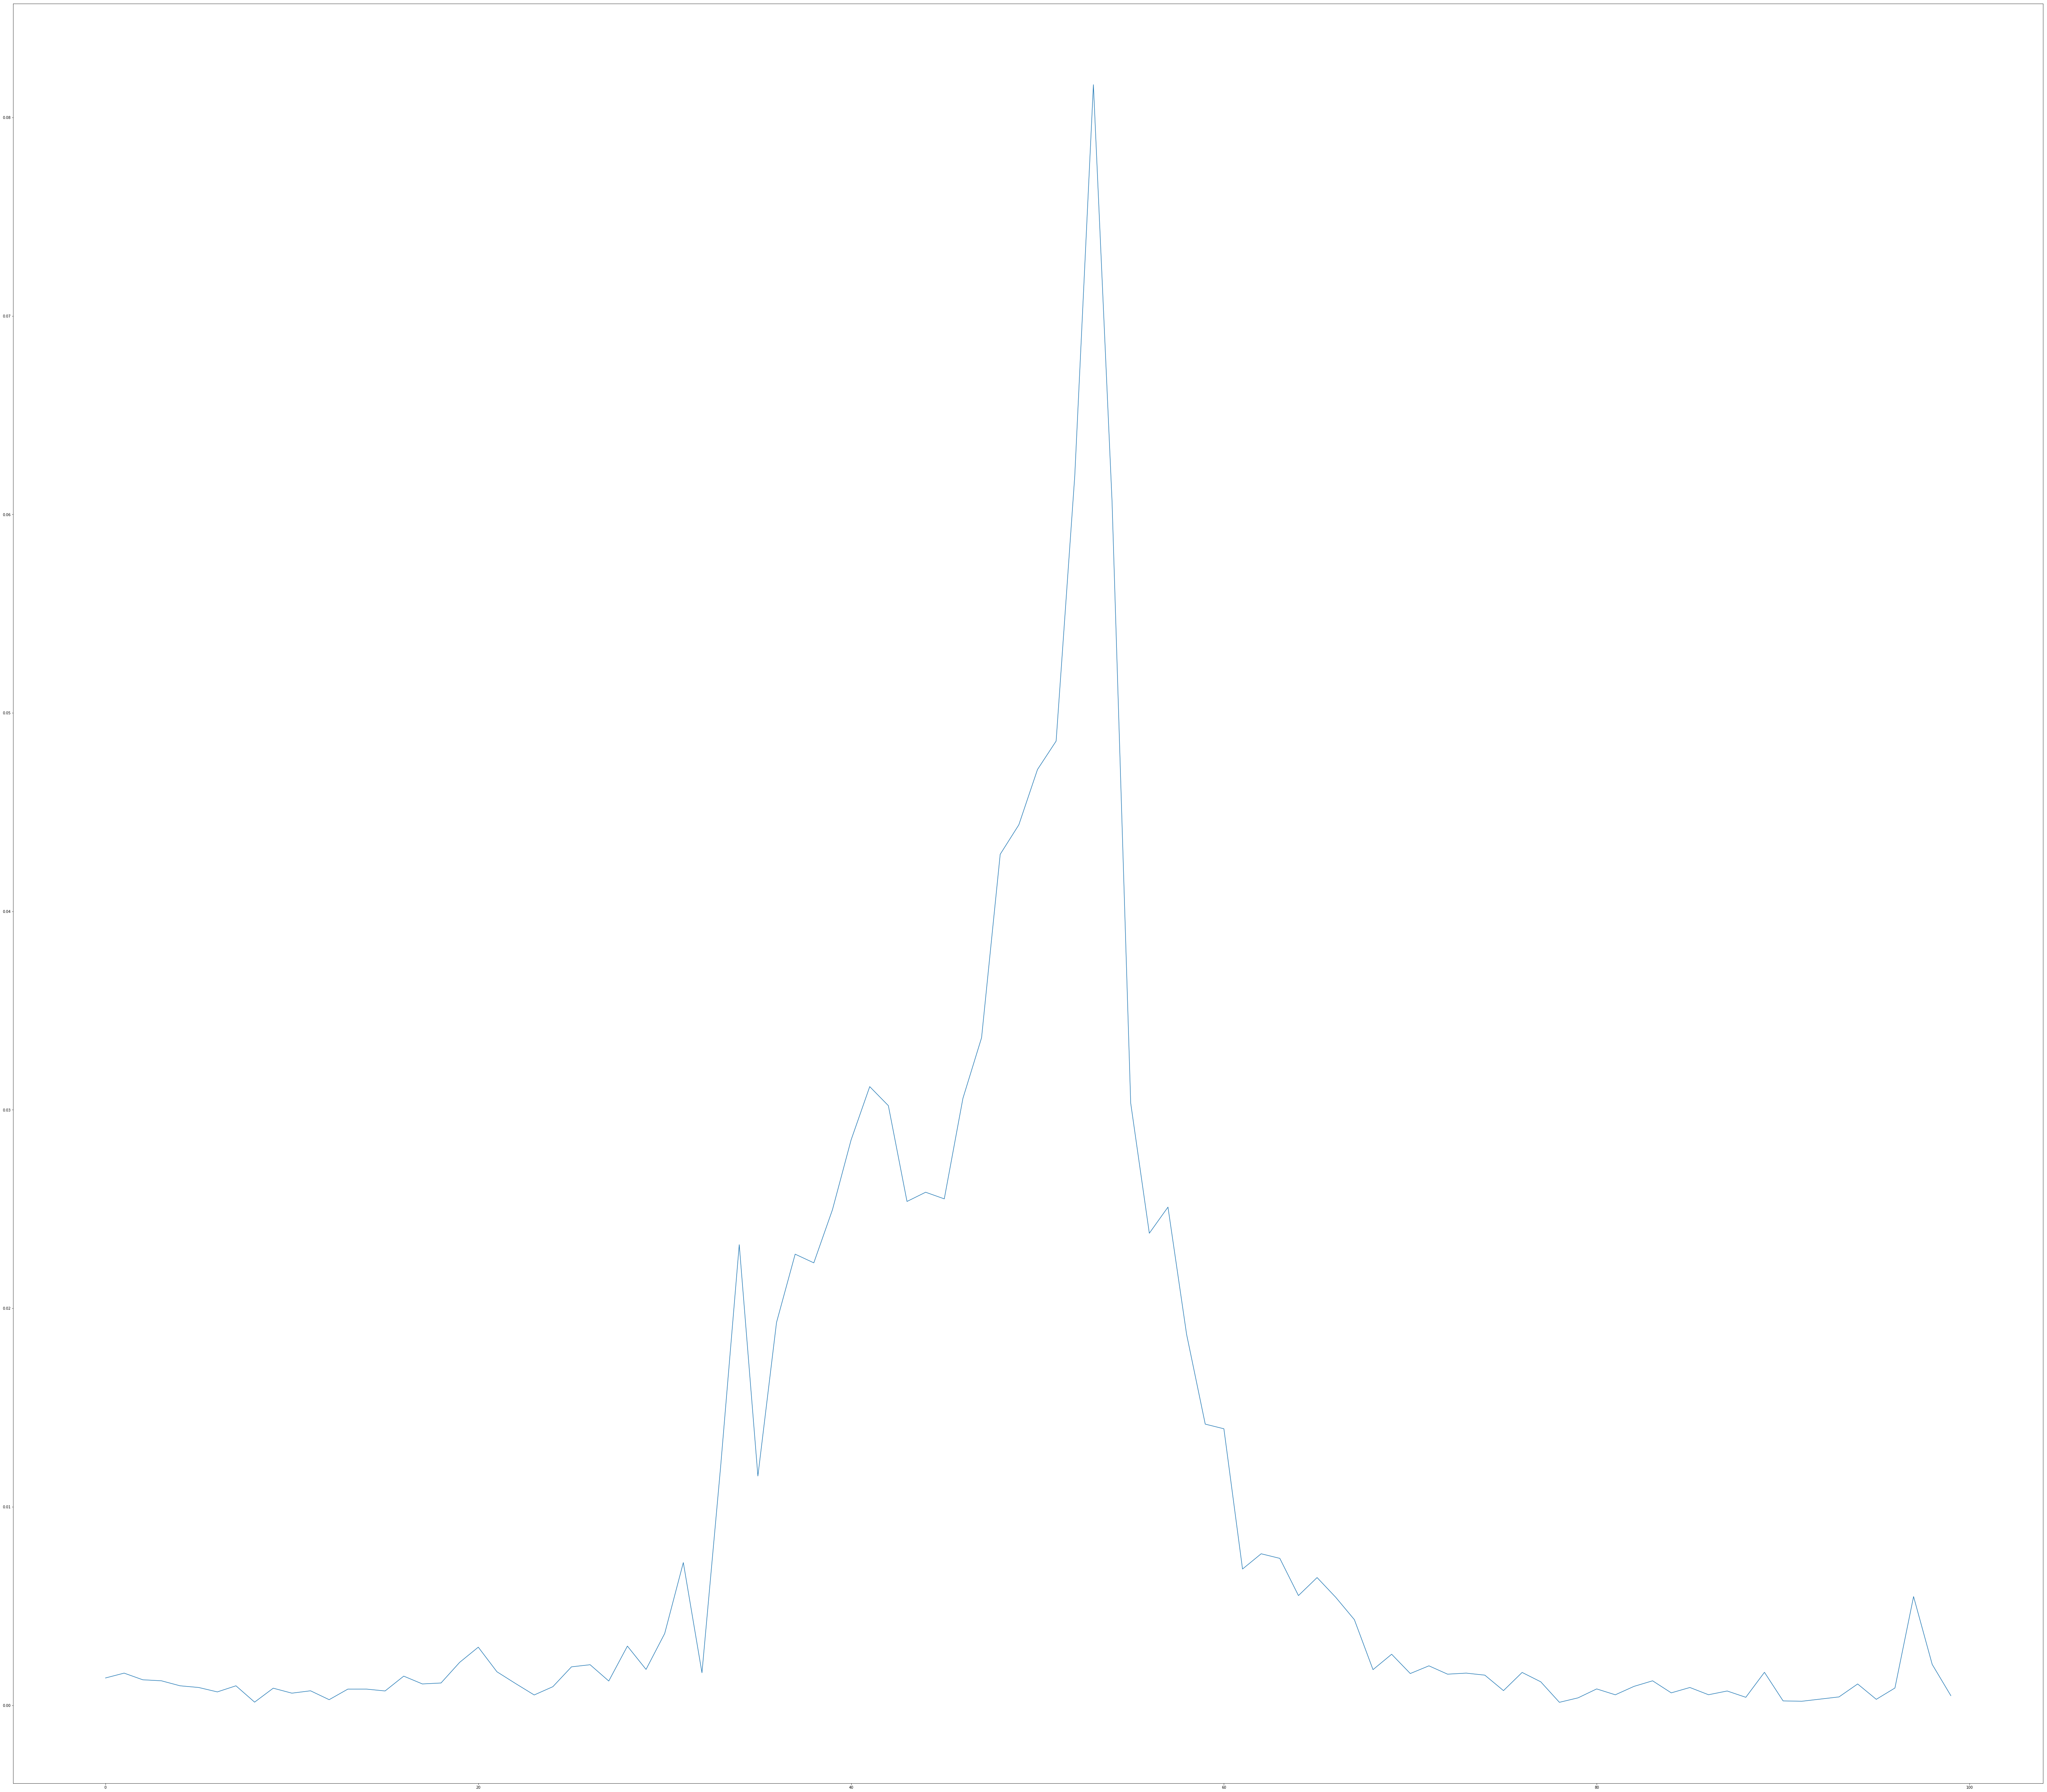

In [18]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(100, 90))
ax = fig.add_subplot(1,1,1)
# ax.set_xlim([600,1500])
ax.plot(ff_data[0])